In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
%matplotlib inline

## a) Cultivar
## b) Alcohol
## c) Malic acid
## d) Ash
## e) Alcalinity of ash
## f) Magnesium
## g) Total phenols
## h) Flavanoids
## i) Nonflavanoid phenols
## j) Proanthocyanins
## k)Color intensity
## l)Hue
## m)OD280/OD315 of diluted wines
## n)Proline

In [ ]:
df = pd.read_csv('wine.data', header=0, sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       178 non-null    int64  
 1   b       178 non-null    float64
 2   c       178 non-null    float64
 3   d       178 non-null    float64
 4   e       178 non-null    float64
 5   f       178 non-null    int64  
 6   g       178 non-null    float64
 7   h       178 non-null    float64
 8   i       178 non-null    float64
 9   j       178 non-null    float64
 10  k       178 non-null    float64
 11  l       178 non-null    float64
 12  m       178 non-null    float64
 13  n       178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
n= df.shape[0] # nombre de ligne
d=  df.shape[1] # nombre de colonnes/variables (p+q)
print(n)
print(d)

178
14


### Apply ACC (with or without sklean package)


In [ ]:
X = df[["b","c","d","g","j","l","m"]]
p=X.shape[1]
print("p:",p)
print("n:",X.shape[0])
print(n==X.shape[0])

Y = df[["e","f","h","i","k","n"]]
q=Y.shape[1]
print("q:",q)
print("n:",Y.shape[0])
print(n==Y.shape[0])

p: 7
n: 178
True
q: 6
n: 178
True


### Étape 1

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

scaler.fit(Y)
Y = scaler.transform(Y)

### Étape 2

In [ ]:
Cor = np.corrcoef(X, Y,rowvar=False) # np.corrcoef(X.T, Y.T) 
print("Dim full correlation matrix: ",Cor.shape)
Vxx = Cor[0:7,0:7]
print("Dim Vxx: ",Vxx.shape)
Vyy = Cor[7:13,7:13]
print("Dim Vyy: ",Vyy.shape)
Vxy =Cor[0:7,7:13]
print("Dim Vxy: ",Vxy.shape)
Vyx = Cor[7:13,0:7]
print("Dim Vyx: ",Vyx.shape)

Dim full correlation matrix:  (13, 13)
Dim Vxx:  (7, 7)
Dim Vyy:  (6, 6)
Dim Vxy:  (7, 6)
Dim Vyx:  (6, 7)


### Étape 3

In [ ]:
Rx = np.dot(np.dot(np.linalg.inv(Vxx), Vxy), np.dot(np.linalg.inv(Vyy), Vyx))
print("Dim Rx: ",Rx.shape)
Ry = np.dot(np.dot(np.linalg.inv(Vyy), Vyx), np.dot(np.linalg.inv(Vxx), Vxy))
print("Dim Ry: ",Ry.shape)

Dim Rx:  (7, 7)
Dim Ry:  (6, 6)


### Étape 4

In [ ]:
from numpy.linalg import eig
lambda_a, a = eig(Rx)
print("lambda_1: ",lambda_a)
print("a: ",a)
print("Dim a: ",a.shape)
lambda_b, b = eig(Ry)
print("lambda_2: ",lambda_b)
print("b: ",b)
print("Dim b: ",b.shape)

lambda_1:  [8.55614811e-01 6.79074486e-01 4.80653762e-01 1.88172256e-01
 4.80401748e-02 2.87843408e-17 1.46776262e-02]
a:  [[ 0.1151946  -0.61282593 -0.53192395 -0.42290575  0.15073886  0.10137422
  -0.08369666]
 [-0.10780054  0.15001644  0.1567428  -0.07337645 -0.1096351   0.81675871
   0.3118962 ]
 [ 0.13619324 -0.35001653  0.80852446 -0.16708002  0.09562823 -0.17779617
  -0.04884839]
 [ 0.73546817 -0.24171934 -0.08303751  0.4738232  -0.43826921 -0.21362385
   0.68746565]
 [ 0.24846108 -0.22651207  0.14210432  0.22083659 -0.13027143  0.37240256
  -0.64827994]
 [ 0.26993874  0.32119541  0.10807907 -0.71587304 -0.41664022  0.29216559
   0.00282769]
 [ 0.53013902  0.51626101  0.00261945 -0.04581981  0.75728037  0.14607347
  -0.02110835]]
Dim a:  (7, 7)
lambda_2:  [0.85561481 0.67907449 0.48065376 0.18817226 0.04804017 0.01467763]
b:  [[-0.03818986  0.18518488 -0.81069306 -0.02515003 -0.44681735 -0.08850708]
 [-0.03252961  0.15751277 -0.26436488 -0.02916962  0.33561905  0.80514501]
 [-0.

### Étape 5

In [ ]:
U = np.dot(X,a[:,0:2])
print("Dim U: ",U.shape)
V = np.dot(Y,b[:,[0,2]])
print("Dim V: ",V.shape)

Dim U:  (178, 2)
Dim V:  (178, 2)


In [ ]:
U = -U

In [ ]:
corr_cca1 = pd.DataFrame(np.corrcoef(U.T, V.T),index=["$U_1$","$U_2$","$V_1$","$V_2$"],columns=["$U_1$","$U_2$","$V_1$","$V_2$"])
corr_cca1.style.background_gradient(cmap='coolwarm')

,$U_1$,$U_2$,$V_1$,$V_2$
$U_1$,1.000000,-0.000000,0.924994,-0.000000
$U_2$,-0.000000,1.000000,-0.000000,-0.000000
$V_1$,0.924994,-0.000000,1.000000,-0.000000
$V_2$,-0.000000,-0.000000,-0.000000,1.000000


In [ ]:
data_tr = df[["b","c","d","e","f","g","h","i","j","k","l","m","n"]]

In [ ]:
from sklearn.cross_decomposition import CCA

cca = CCA() 
cca.fit(X, Y)
U_, V_ = cca.transform(X, Y)
corr_cca2 = pd.DataFrame(np.corrcoef(U_.T, V_.T),index=["$U_1$","$U_2$","$V_1$","$V_2$"],columns=["$U_1$","$U_2$","$V_1$","$V_2$"])
corr_cca2.style.background_gradient(cmap='coolwarm')

,$U_1$,$U_2$,$V_1$,$V_2$
$U_1$,1.000000,0.000000,0.924994,-0.000000
$U_2$,0.000000,1.000000,0.000449,0.824060
$V_1$,0.924994,0.000449,1.000000,-0.000000
$V_2$,-0.000000,0.824060,-0.000000,1.000000


#### On voit que la correlation est positive et forte

In [ ]:
np.round(corr_cca2.loc["$U_1$","$V_1$"],decimals=3)

0.925

In [ ]:
# en utilisant sklearn, vous devez quand même calculer les matrices centrée-réduites pour tracer le cercle de corrélation
scaled_data=pd.DataFrame(np.concatenate((X,Y),axis=1),columns=["b","c","d","g","j","l","m","e","f","h","i","k","n"])
scaled_data.head()

,b,c,d,g,j,l,m,e,f,h,i,k,n
0,1.518613,-0.562250,0.232053,0.808997,1.224884,0.362177,1.847920,-1.169593,1.913905,1.034819,-0.659563,0.251717,1.013009
1,0.246290,-0.499413,-0.827996,0.568648,-0.544721,0.406051,1.113449,-2.490847,0.018145,0.733629,-0.820719,-0.293321,0.965242
2,0.196879,0.021231,1.109334,0.808997,2.135968,0.318304,0.788587,-0.268738,0.088358,1.215533,-0.498407,0.269020,1.395148
3,1.691550,-0.346811,0.487926,2.491446,1.032155,-0.427544,1.184071,-0.809251,0.930918,1.466525,-0.981875,1.186068,2.334574
4,0.295700,0.227694,1.840403,0.808997,0.401404,0.362177,0.449601,0.451946,1.281985,0.663351,0.226796,-0.319276,-0.037874


In [ ]:
scaled_data.describe()

,b,c,d,g,j,l,m,e,f,h,i,k,n
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-2.972030e-16,-1.699639e-16,3.717376e-16,2.919013e-16,-1.160121e-16,-1.995907e-17,-4.016762e-16,4.079134e-16,-1.122697e-17,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.107246e+00,-2.069034e+00,-2.094732e+00,-1.895054e+00,-2.671018e+00,-2.088255e+00,-1.695971e+00,-1.868234e+00,-1.634288e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-8.854682e-01,-5.972835e-01,-7.675624e-01,-9.522483e-01,-6.891372e-01,-8.244151e-01,-8.275393e-01,-7.401412e-01,-7.951025e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,9.595986e-02,-6.289785e-02,3.312687e-02,2.377348e-01,1.518295e-03,-1.222817e-01,1.061497e-01,-1.760948e-01,-1.592246e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,8.089974e-01,6.291754e-01,7.131644e-01,7.885875e-01,6.020883e-01,5.096384e-01,8.490851e-01,6.095413e-01,4.939560e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,2.539515e+00,3.485073e+00,3.301694e+00,1.960915e+00,3.154511e+00,4.371372e+00,3.062832e+00,2.402403e+00,3.435432e+00,2.971473e+00


In [ ]:
# Calcul C1 et C2
C1 = np.array((1/2)*(U_[:,0]+V_[:,0])) #avec sklearn, sinon utiliser U et V directement
print("Dim C1: ", C1.shape)
C2 = np.array((1/2)*(U_[:,1]+V_[:,1]))
print("Dim C2: ",C2.shape)
Caxes =  np.array([C1,C2])
print(Caxes.shape)

Dim C1:  (178,)
Dim C2:  (178,)
(2, 178)


In [ ]:
# Calcul la corrélation des variables avec les axes pour obtenir leurs coordonnées
corvar = np.corrcoef(Caxes, scaled_data.T) #use the scaled data

In [ ]:
scaled_data

,b,c,d,g,j,l,m,e,f,h,i,k,n
0,1.518613,-0.562250,0.232053,0.808997,1.224884,0.362177,1.847920,-1.169593,1.913905,1.034819,-0.659563,0.251717,1.013009
1,0.246290,-0.499413,-0.827996,0.568648,-0.544721,0.406051,1.113449,-2.490847,0.018145,0.733629,-0.820719,-0.293321,0.965242
2,0.196879,0.021231,1.109334,0.808997,2.135968,0.318304,0.788587,-0.268738,0.088358,1.215533,-0.498407,0.269020,1.395148
3,1.691550,-0.346811,0.487926,2.491446,1.032155,-0.427544,1.184071,-0.809251,0.930918,1.466525,-0.981875,1.186068,2.334574
4,0.295700,0.227694,1.840403,0.808997,0.401404,0.362177,0.449601,0.451946,1.281985,0.663351,0.226796,-0.319276,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,-0.985614,-0.930179,-1.392758,-1.231206,0.301803,-0.332922,-1.424900,1.274310,1.142811,-0.021952
174,0.493343,1.412609,0.414820,-0.793334,-0.316950,-1.129518,-1.485445,1.052516,0.158572,-1.284344,0.549108,0.969783,0.009893
175,0.332758,1.744744,-0.389355,-1.129824,-0.422075,-1.612125,-1.485445,0.151661,1.422412,-1.344582,0.549108,2.224236,0.280575
176,0.209232,0.227694,0.012732,-1.033684,-0.229346,-1.568252,-1.400699,0.151661,1.422412,-1.354622,1.354888,1.834923,0.296498


In [ ]:
pd.DataFrame(corvar, columns=['C1', 'C2', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6'], index=['C1', 'C2', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6']).style.background_gradient(cmap='coolwarm')

,C1,C2,X1,X2,X3,X4,X5,X6,X7,Y1,Y2,Y3,Y4,Y5,Y6
C1,1.000000,-0.000000,-0.249380,0.451378,-0.138647,-0.913325,-0.683502,-0.626991,-0.858620,0.340739,-0.227780,-0.963910,0.521218,0.228560,-0.534268
C2,-0.000000,1.000000,0.756605,0.063127,0.016136,0.140094,0.085971,-0.323517,-0.225628,-0.559361,0.136625,0.034108,-0.196146,0.676143,0.518112
X1,-0.249380,0.756605,1.000000,0.094397,0.211545,0.289101,0.136698,-0.071747,0.072343,-0.310235,0.270798,0.236815,-0.155929,0.546364,0.643720
X2,0.451378,0.063127,0.094397,1.000000,0.164045,-0.335167,-0.220746,-0.561296,-0.368710,0.288500,-0.054575,-0.411007,0.292977,0.248985,-0.192011
X3,-0.138647,0.016136,0.211545,0.164045,1.000000,0.128980,0.009652,-0.074667,0.003911,0.443367,0.286587,0.115077,0.186230,0.258887,0.223626
X4,-0.913325,0.140094,0.289101,-0.335167,0.128980,1.000000,0.612413,0.433681,0.699949,-0.321113,0.214401,0.864564,-0.449935,-0.055136,0.498115
X5,-0.683502,0.085971,0.136698,-0.220746,0.009652,0.612413,1.000000,0.295544,0.519067,-0.197327,0.236441,0.652692,-0.365845,-0.025250,0.330417
X6,-0.626991,-0.323517,-0.071747,-0.561296,-0.074667,0.433681,0.295544,1.000000,0.565468,-0.273955,0.055398,0.543479,-0.262640,-0.521813,0.236183
X7,-0.858620,-0.225628,0.072343,-0.368710,0.003911,0.699949,0.519067,0.565468,1.000000,-0.276769,0.066004,0.787194,-0.503270,-0.428815,0.312761
Y1,0.340739,-0.559361,-0.310235,0.288500,0.443367,-0.321113,-0.197327,-0.273955,-0.276769,1.000000,-0.083333,-0.351370,0.361922,0.018732,-0.440597


# Observation visualization


Text(0, 0.5, 'Second CCA Components')

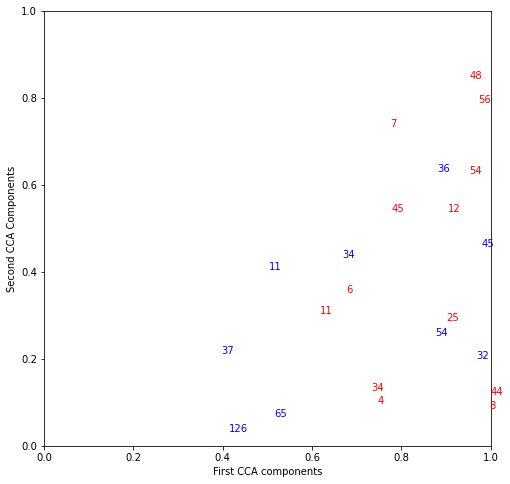

In [ ]:
from matplotlib.pyplot import figure
fig, axes = plt.subplots(figsize=(8,8))
U1 = U_[:,0]
V1 = V_[:,0]
U2 = U_[:,1]
V2 = V_[:,1]

for i in range(n):
    plt.annotate(i, (U1[i],U2[i]), color="b")
    plt.annotate(i, (V1[i],V2[i]), color="r")

plt.xlabel('First CCA components')
plt.ylabel('Second CCA Components')
# plt.savefig("obs_visualization")

## Variable representation

In [ ]:
scaled_data=pd.DataFrame(np.concatenate((X,Y),axis=1),columns=["b","c","d","e","f","g","h","i","j","k","l","m","n"])
scaled_data.head()

,b,c,d,e,f,g,h,i,j,k,l,m,n
0,1.518613,-0.562250,0.232053,0.808997,1.224884,0.362177,1.847920,-1.169593,1.913905,1.034819,-0.659563,0.251717,1.013009
1,0.246290,-0.499413,-0.827996,0.568648,-0.544721,0.406051,1.113449,-2.490847,0.018145,0.733629,-0.820719,-0.293321,0.965242
2,0.196879,0.021231,1.109334,0.808997,2.135968,0.318304,0.788587,-0.268738,0.088358,1.215533,-0.498407,0.269020,1.395148
3,1.691550,-0.346811,0.487926,2.491446,1.032155,-0.427544,1.184071,-0.809251,0.930918,1.466525,-0.981875,1.186068,2.334574
4,0.295700,0.227694,1.840403,0.808997,0.401404,0.362177,0.449601,0.451946,1.281985,0.663351,0.226796,-0.319276,-0.037874


In [ ]:
# Calcul C1 et C2
C1 = np.array((1/2)*(U[:,0]+V[:,0]))
print("Dim C1: ", C1.shape)
C2 = np.array((1/2)*(U[:,1]+V[:,1]))
print("Dim C2: ",C2.shape)
Caxes =  np.array([C1,C2])
print(Caxes.shape)

Dim C1:  (178,)
Dim C2:  (178,)
(2, 178)


In [ ]:
# Calcul la corrélation des variables avec les axes pour obtenir leurs coordonnées
corvar = np.corrcoef(Caxes, scaled_data.T) #use the scaled data

##### Correlation circle

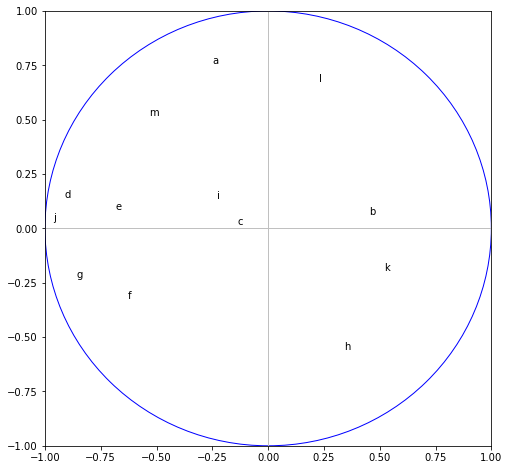

In [ ]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(q+p):
    plt.annotate(df.columns[j],(corvar[j+2,0],corvar[j+2,1]))

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()

 Les variables sont positivement corrélées si elles sont proches les unes des autres, négativement corrélées si elles forment un angle de 180 degrés et ne sont pas corrélées si elles forment un angle de 90 degrés.
### Ce cercle de correlation nous montre que la plus part des variables sont assez bien représentés mis à part i et c car ils sont proches de 0
##### Il nous montre également qu'il y a 2 groupes de variables corrélées à l'axe1 et 2 variables corrélé à l'axe 2 :

*   groupe 1 :j, d , e, g et f
*   groupe 2 : b, k

 
et donc 
* groupe 1: Proanthocyanins, Ash et Alcalinity of ash, Total phenols, Magnesium
* groupe 2: Alcohol, Color intensity

Les corrélations les plus fortes sont celles correspondant aux coefficients de corrélation les plus proches de 1 ou -1. Ici, le coefficient de corrélation dont la valeur absolue est la plus proche de 1 est celui qui relie j:Proanthocyanins  et  d:Ash



### Observation visualization

Text(0, 0.5, 'Second CCA Components')

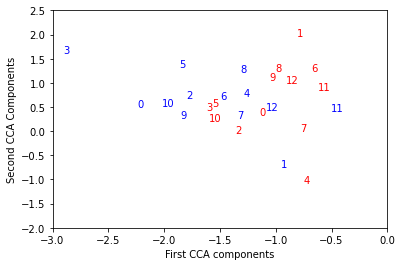

In [ ]:
# Reprensentation des individus sur le plan
U1 = U[:,0][:13]
V1 = V[:,0][:13]
U2 = U[:,1][:13]
V2 = V[:,1][:13]

for i in range(13):
    plt.annotate(i, (U1[i],U2[i]), color="b")
    plt.annotate(i, (V1[i],V2[i]), color="r")
plt.xlim(-3,0)
plt.ylim(-2,2.5)
plt.xlabel('First CCA components')
plt.ylabel('Second CCA Components')
